# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

# Prelude
My own implementation of the gradient descent algorithm based on equation 4.5 of the book.
It is probably not as efficient as the author's implementation (which is based on equation 4.6 of the book).

In [2]:
from sklearn.linear_model import LinearRegression

x1 = 2 * np.random.rand(100, 1)
x2 = 4 * np.random.rand(100, 1)
y = 2 + (5 * x1) + (8 * x2) + np.random.randn(100, 1)
X = np.c_[x1, x2]

lin_reg = LinearRegression()
lin_reg.fit(X = X, y = y)
print(lin_reg.intercept_, lin_reg.coef_)

X_b = np.c_[np.ones((X.shape[0], 1)), X] # add x_{0} = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

eta = 0.1 # learning rate
n_iterations = 1000
m = X_b.shape[0]

theta = np.random.randn(X_b.shape[1], 1)

for iteration in range(n_iterations):
    gradients = []
    n_features = X_b.shape[1]
    for feature in range(n_features):
        gradient = 0
        for instance, label in zip(X_b, y):
            gradient += (theta.T.dot(instance) - label) * instance[feature]
        gradient *= 2 / m
        gradients.append(gradient)
    gradients = np.array(gradients)
    theta = theta - eta * gradients

print(theta)

[1.91061004] [[4.82913734 8.17982785]]
[[1.91061004]
 [4.82913734]
 [8.17982785]]
[[1.91061004]
 [4.82913734]
 [8.17982785]]


# The Normal Equation

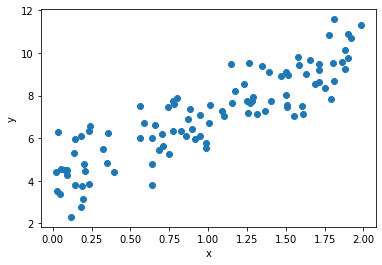

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

fig, axes = plt.subplots()
axes.scatter(x = X, y = y)
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()

[[100.          98.86282135]
 [ 98.86282135 133.75261334]]
133.75261333973137
133.75261333973137


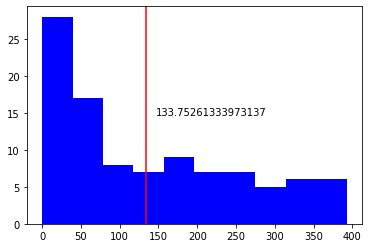

[[4.10047792]
 [2.98799712]]


In [4]:
X_b = np.c_[np.ones((X.shape[0], 1)), X] # add x_{0} = 1 to each instance
print(X_b.T.dot(X_b))

average = np.mean(X * X) * X.shape[0]
matrix_element = X_b.T.dot(X_b)[1][1]
print(average)
print(matrix_element)
assert abs(average - matrix_element) < 1e-13

fig, axes = plt.subplots()
axes.hist(x = X * X * X.shape[0], color = 'blue')
axes.axvline(x = average, ymin = 0, ymax = 1, color = 'red')
axes.text(x = average * 1.1, y = 0.5 * (axes.get_ylim()[1] - axes.get_ylim()[0]), s = f'{average}')
plt.show()

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[ 4.16524366]
 [10.01973093]]


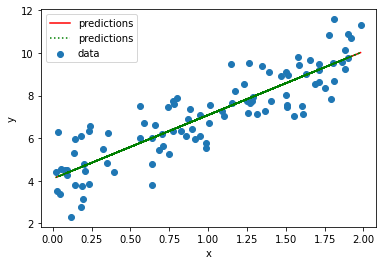

In [5]:
X_new = np.array([min(X), max(X)])
X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new] # add x_{0} = 1 to each instance
y_predict_1 = X_new_b.dot(theta_best)
print(y_predict_1)

y_predict_2 = theta_best[0] + theta_best[1] * X

fig, axes = plt.subplots()
axes.scatter(x = X, y = y, label = 'data')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.plot(X_new, y_predict_1, color = 'red', linestyle = 'solid', label = 'predictions')
axes.plot(X, y_predict_2, color = 'green', linestyle = 'dotted', label = 'predictions')
axes.legend()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X = X, y = y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X = X_new))

[4.10047792] [[2.98799712]]
[[ 4.16524366]
 [10.01973093]]


In [7]:
# _svd = singular value decomposition, as explained on page 119
theta_best_svd, residual, rank, s = np.linalg.lstsq(a = X_b, b = y, rcond = 1e-6)
print(theta_best_svd)

[[4.10047792]
 [2.98799712]]


In [8]:
print(np.linalg.pinv(X_b).dot(y))

[[4.10047792]
 [2.98799712]]


# Batch Gradient Descent

In [9]:
batch_gradient_descent_thetas = [] # for plotting later on

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = X_b.shape[0]

theta = np.random.randn(X_b.shape[1], 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    batch_gradient_descent_thetas.append(theta)
    
print(theta)
print(X_new_b.dot(theta))

[[4.10047792]
 [2.98799712]]
[[ 4.16524366]
 [10.01973093]]


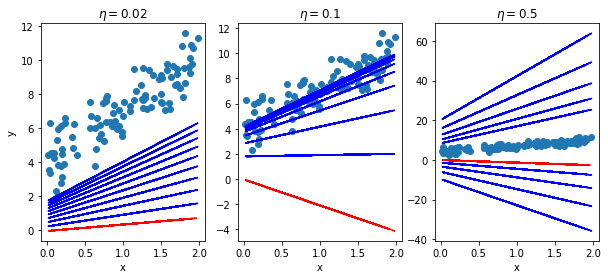

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))

for eta, axes in zip((0.02, 0.1, 0.5), axes):
    
    axes.scatter(x = X, y = y)
    axes.set_xlabel('x')
    axes.set_title(f'$\eta={eta}$')
    
    m = X_b.shape[0]
    theta = np.random.randn(X_b.shape[1], 1)
    
    for iteration in range(10):

        y_predict = X_b.dot(theta)
        
        if iteration == 0:
            color = 'red'
            linestyle = 'dashed'
        else:
            color = 'blue'
            linestyle = 'solid'
        
        axes.plot(X, y_predict, color = color, linestyle = linestyle)
            
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
            
fig.axes[0].set_ylabel('y')
plt.show()

In [12]:
eta = 0.1 # learning rate
m = X_b.shape[0]
epsilon = 1e-6

theta = np.random.randn(X_b.shape[1], 1)

while True:
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    norm = np.sqrt(gradients.T.dot(gradients))
    #print(gradients)
    #print(norm)
    if norm < epsilon:
        break
    
print(theta)

[[4.10047571]
 [2.98799898]]


# Stochastic Gradient Descent

Below is my quick implementation of stochastic gradient descent.
Note that slicing is performed so that the resulting dimensions allow matrix multiplication.
In the gradient calculation, note that m = 1, since only a single, random instance is being used.

In [13]:
index = 5
quantity_1 = X_b[index]
quantity_2 = X_b[index:index + 1]
print(quantity_1)
print(quantity_2)
print(quantity_1.shape)
print(quantity_2.shape)

[1.        0.0814576]
[[1.        0.0814576]]
(2,)
(1, 2)


In [14]:
eta = 0.1 # learning rate
n_iterations = 1000

theta = np.random.randn(X_b.shape[1], 1)

for iteration in range(n_iterations):
    random_index = np.random.randint(m)
    #xi = X_b[random_index]
    #yi = y[random_index]
    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]

    #print('=====')
    #print(xi)
    #print(yi)
    #print(theta)
    #print(xi.T.shape)
    #quantity = xi.dot(theta) - yi
    #print(quantity.shape)

    m = xi.shape[0]
    gradients = 2 / m * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - eta * gradients
    
print(theta)

[[2.63084552]
 [4.24296114]]


Experimenting with different learning rates. As shown in the plot below, for each learning rate, the algorithm always converges, but not necessarily to the correct values

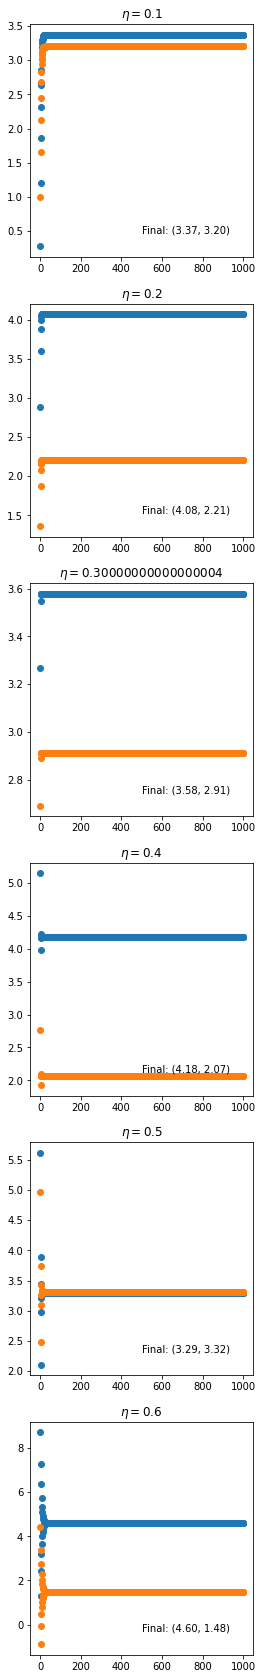

In [15]:
etas = np.linspace(0.1, 0.6, 6)

fig, axes = plt.subplots(nrows = len(etas), ncols = 1, figsize = (4, 30))

for eta, axes in zip(etas, fig.axes):

    thetas = []
    
    n_iterations = 1000
    theta = np.random.randn(X_b.shape[1], 1)

    for iteration in range(n_iterations):
        
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        
        m = xi.shape[0]
        gradients = 2 / m * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        
        thetas.append(theta)
        
    iterations = [i + 1 for i in range(len(thetas))]
    theta_0 = [theta[0] for theta in thetas]
    theta_1 = [theta[1] for theta in thetas]
    
    axes.scatter(x = iterations, y = theta_0)
    axes.scatter(x = iterations, y = theta_1)
    axes.set_title(f'$\eta={eta}$')
    axes.text(x = 0.5, y = 0.1, s = f'Final: ({theta_0[-1][0]:.2f}, {theta_1[-1][0]:.2f})', transform = axes.transAxes)
                
plt.show()

Repeat the above cell, but decrease the learning rate with each iteration (that is, use a learning schedule).

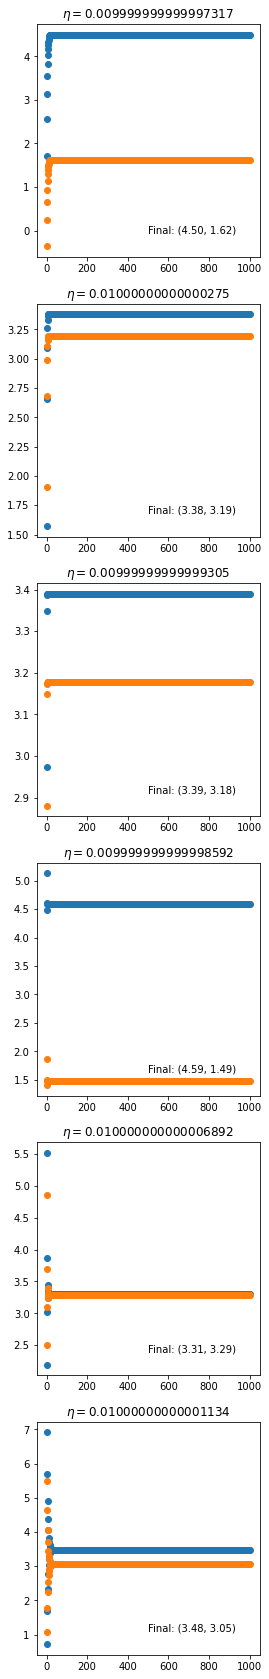

In [16]:
etas = np.linspace(0.1, 0.6, 6)
final_eta = 0.01 # learning rate at final iteration

fig, axes = plt.subplots(nrows = len(etas), ncols = 1, figsize = (4, 30))

for eta, axes in zip(etas, fig.axes):

    thetas = []
    
    n_iterations = 1000
    theta = np.random.randn(X_b.shape[1], 1)

    eta_delta = (eta - final_eta) / n_iterations
    
    for iteration in range(n_iterations):
        
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        
        m = xi.shape[0]
        gradients = 2 / m * xi.T.dot(xi.dot(theta) - yi)
        eta -= eta_delta
        theta = theta - eta * gradients
        
        thetas.append(theta)
      
    assert abs(eta - final_eta) < 1e-10
    
    iterations = [i + 1 for i in range(len(thetas))]
    theta_0 = [theta[0] for theta in thetas]
    theta_1 = [theta[1] for theta in thetas]
    
    axes.scatter(x = iterations, y = theta_0)
    axes.scatter(x = iterations, y = theta_1)
    axes.set_title(f'$\eta={eta}$')
    axes.text(x = 0.5, y = 0.1, s = f'Final: ({theta_0[-1][0]:.2f}, {theta_1[-1][0]:.2f})', transform = axes.transAxes)
                
plt.show()

The algorithm still does not converge to the correct values. Differences between my implementation and the author's implementation:
* My algorithm performs 1000 iterations. The author's algorithm performs n_epochs * m = 50 * 100 = 5000 iterations. I tried 5000 iterations in my algorithm, but still do not obtain the correct values
* My algorithm is not divided into epochs. I would think that randomly sampling an instance N times (my implementation) would be the same as for B times, randomly sampling an instance C times (author's implementation), provided B * C == N
* My implementation attempts to use a learning schedule in the last cell. That learning schedule is different from the author's implementation

I'll continue with the author's implementation

In [17]:
stochastic_gradient_descent_thetas = [] # for plotting later on

In [18]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(X_b.shape[1], 1)

m = X_b.shape[0]

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        stochastic_gradient_descent_thetas.append(theta)
        
print(theta)

[[4.08331832]
 [2.99550176]]


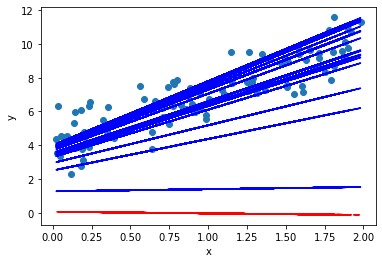

In [19]:
theta = np.random.randn(X_b.shape[1], 1)

fig, axes = plt.subplots()
axes.scatter(x = X, y = y)

for epoch in range(n_epochs):
    for i in range(m):
        
        if epoch == 0 and i < 20:
            y_predict = X_b.dot(theta)
        
            if i == 0:
                color = 'red'
                linestyle = 'dashed'
            else:
                color = 'blue'
                linestyle = 'solid'
        
            axes.plot(X, y_predict, color = color, linestyle = linestyle)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
            
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X = X, y = y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.07679165] [2.96151209]


# Mini-batch Gradient Descent

In [21]:
minibatch_gradient_descent_thetas = [] # for plotting later on

In [22]:
n_iterations = 50
minibatch_size = 20

theta = np.random.randn(X_b.shape[1], 1)
m = X_b.shape[0]

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        minibatch_gradient_descent_thetas.append(theta)
        
print(theta)

[[4.05251201]
 [2.92929777]]


In [23]:
batch_gradient_descent_thetas = np.array(batch_gradient_descent_thetas)
stochastic_gradient_descent_thetas = np.array(stochastic_gradient_descent_thetas)
minibatch_gradient_descent_thetas = np.array(minibatch_gradient_descent_thetas)

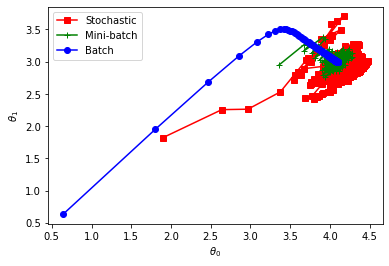

In [24]:
fig, axes = plt.subplots()

axes.plot(stochastic_gradient_descent_thetas[:, 0],
          stochastic_gradient_descent_thetas[:, 1],
          label = 'Stochastic',
          marker = 's',
          color = 'red')

axes.plot(minibatch_gradient_descent_thetas[:, 0],
          minibatch_gradient_descent_thetas[:, 1],
          label = 'Mini-batch',
          marker = '+',
          color = 'green')

axes.plot(batch_gradient_descent_thetas[:, 0],
          batch_gradient_descent_thetas[:, 1],
          label = 'Batch',
          marker = 'o',
          color = 'blue')

axes.set_xlabel(r'$\theta_{0}$')
axes.set_ylabel(r'$\theta_{1}$')
axes.legend()
plt.show()

# Polynomial Regression

In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

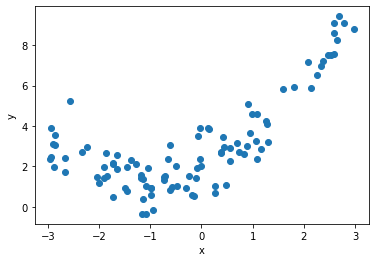

In [26]:
fig, axes = plt.subplots()
axes.scatter(x = X, y = y)
axes.set_xlabel('x')
axes.set_ylabel('y')
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X = X)

print(X[0])
print(X_poly[0])

print(X[0]**2)
assert X_poly[0][1] == X[0]**2

[-1.13327592]
[-1.13327592  1.2843143 ]
[1.2843143]


In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X = X_poly, y = y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.92772805] [[1.08031838 0.51047014]]


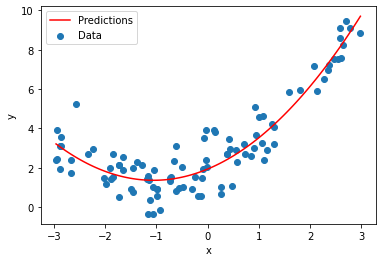

In [29]:
X_new = np.linspace(start = min(X), stop = max(X), num = 100)
X_new_poly = poly_features.transform(X = X_new)
y_predict = lin_reg.predict(X = X_new_poly)

fig, axes = plt.subplots()
axes.scatter(x = X, y = y, label = 'Data')
axes.plot(X_new, y_predict, color = 'red', label = 'Predictions')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend()
plt.show()

# Learning Curves

In [30]:
# Degree: 1

degree_1_features = PolynomialFeatures(degree = 1, include_bias = False)
X_degree_1 = degree_1_features.fit_transform(X = X)

lin_reg.fit(X = X_degree_1, y = y)

X_new_degree_1 = degree_1_features.transform(X = X_new)
y_predict_degree_1 = lin_reg.predict(X = X_new_degree_1)

# Degree: 300
# Scaling is necessary

degree_300_features = PolynomialFeatures(degree = 300, include_bias = False)
X_degree_300 = degree_300_features.fit_transform(X = X)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

X_degree_300 = standard_scaler.fit_transform(X = X_degree_300)

lin_reg.fit(X = X_degree_300, y = y)

X_new_degree_300 = degree_300_features.transform(X = X_new)
X_new_degree_300 = standard_scaler.transform(X = X_new_degree_300)
y_predict_degree_300 = lin_reg.predict(X = X_new_degree_300)

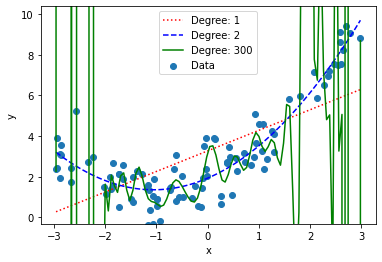

In [31]:
fig, axes = plt.subplots()
axes.scatter(x = X, y = y, label = 'Data')
axes.plot(X_new, y_predict_degree_1, color = 'red', linestyle = 'dotted', label = 'Degree: 1')
axes.plot(X_new, y_predict, color = 'blue', linestyle = 'dashed', label = 'Degree: 2')
axes.plot(X_new, y_predict_degree_300, color = 'green', linestyle = 'solid', label = 'Degree: 300')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim(0.9 * min(y), 1.1 * max(y))
axes.legend()
plt.show()

Make the above plot with a pipeline, as done by the author

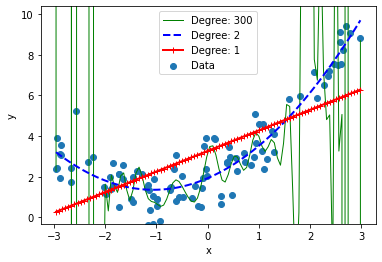

In [32]:
from sklearn.pipeline import Pipeline

fig, axes = plt.subplots()

axes.scatter(x = X, y = y, label = 'Data')

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    poly_features = PolynomialFeatures(degree = degree, include_bias = False)
    standard_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline(
        steps = [
            ('poly_features', poly_features),
            ('standard_scaler', standard_scaler),
            ('lin_reg', lin_reg)
    ])
    polynomial_regression.fit(X = X, y = y) # fit, not fit_transform
    y_predict = polynomial_regression.predict(X = X_new)
    axes.plot(X_new, y_predict, style, linewidth = width, label = f'Degree: {degree}')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_ylim(0.9 * min(y), 1.1 * max(y))
axes.legend()
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_learning_curves(model, X, y):
    train_rmses = []
    test_rmses = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    for m in range(1, len(X_train) + 1): # author's notebook does not have + 1
        model.fit(X = X_train[:m], y = y_train[:m])
        y_train_predict = model.predict(X = X_train[:m])
        y_test_predict = model.predict(X = X_test)
        
        train_mse = mean_squared_error(y_true = y_train[:m], y_pred = y_train_predict)
        train_rmse = np.sqrt(train_mse)
        train_rmses.append(train_rmse)
        
        test_mse = mean_squared_error(y_true = y_test, y_pred = y_test_predict)
        test_rmse = np.sqrt(test_mse)
        test_rmses.append(test_rmse)
        
    return train_rmses, test_rmses

In [34]:
lin_reg = LinearRegression()
train_rmses, test_rmses = get_learning_curves(model = lin_reg, X = X, y = y)

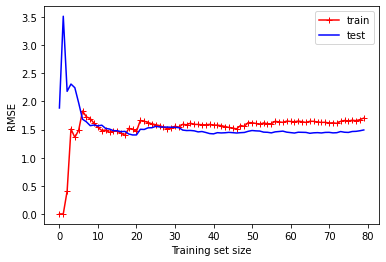

In [35]:
fig, axes = plt.subplots()
axes.plot(train_rmses, color = 'red', marker = '+', label = 'train')
axes.plot(test_rmses, color = 'blue', label = 'test')
axes.set_xlabel('Training set size')
axes.set_ylabel('RMSE')
axes.legend()
plt.show()

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    steps = [
        ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
        ('lin_reg', LinearRegression())
    
])

train_rmses, test_rmses = get_learning_curves(model = polynomial_regression, X = X, y = y)

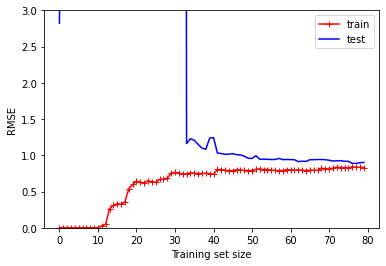

In [37]:
fig, axes = plt.subplots()
axes.plot(train_rmses, color = 'red', marker = '+', label = 'train')
axes.plot(test_rmses, color = 'blue', label = 'test')
axes.set_xlabel('Training set size')
axes.set_ylabel('RMSE')
axes.set_ylim(0, 3)
axes.legend()
plt.show()

In [38]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    steps = [
        ('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
        ('lin_reg', LinearRegression())
    
])

train_rmses, test_rmses = get_learning_curves(model = polynomial_regression, X = X, y = y)

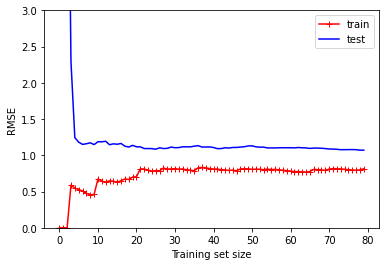

In [39]:
fig, axes = plt.subplots()
axes.plot(train_rmses, color = 'red', marker = '+', label = 'train')
axes.plot(test_rmses, color = 'blue', label = 'test')
axes.set_xlabel('Training set size')
axes.set_ylabel('RMSE')
axes.set_ylim(0, 3)
axes.legend()
plt.show()

# Ridge Regression

In [40]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(start = 0, stop = 3, num = 100).reshape(100, 1)

In [41]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky', random_state = 42)
ridge_reg.fit(X = X, y = y)
print(ridge_reg.predict(X = [[1.5]]))

[[1.82835594]]


In [42]:
ridge_reg = Ridge(alpha = 1, solver = 'sag', random_state = 42)
ridge_reg.fit(X = X, y = y)
print(ridge_reg.predict(X = [[1.5]]))

[[1.82835528]]


In [43]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, axes, **model_kwargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kwargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline(steps = [
                ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model)
            ])
        model.fit(X = X, y = y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        axes.plot(X_new, y_new_regul, style, linewidth = lw, label = r'$\alpha={}$'.format(alpha))
        axes.plot(X, y, 'b.', linewidth = 3)

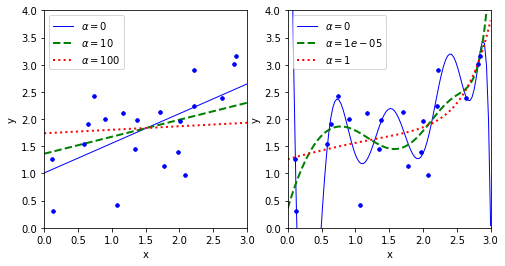

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100), axes = axes[0], random_state = 42)
plot_model(Ridge, polynomial = True, alphas = (0, 10**-5, 1), axes = axes[1], random_state = 42)
for axes in fig.axes:
    axes.legend()
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_xlim(0, 3)
    axes.set_ylim(0, 4)
plt.show()

In [45]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X = X, y = y.ravel())
print(sgd_reg.predict(X = [[1.5]]))

[1.72465731]


# Lasso Regression

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.826185554926774, tolerance: 0.0011651281612659714
  model = cd_fast.enet_coordinate_descent(


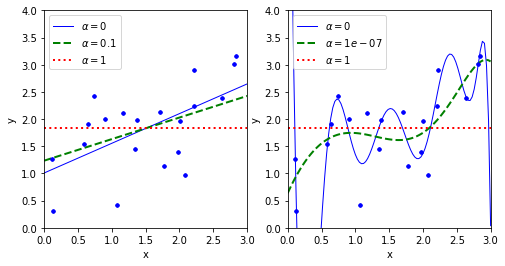

In [46]:
from sklearn.linear_model import Lasso

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1), axes = axes[0], random_state = 42)
plot_model(Lasso, polynomial = True, alphas = (0, 10**-7, 1), axes = axes[1], random_state = 42)
for axes in fig.axes:
    axes.legend()
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_xlim(0, 3)
    axes.set_ylim(0, 4)
plt.show()

In [47]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X = X, y = y)
lasso_reg.predict(X = [[1.5]])

array([1.83017558])

# Elastic Net

In [48]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X = X, y = y)
elastic_net.predict(X = [[1.5]])

array([1.82949086])

# Early Stopping

In [49]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

In [50]:
from copy import deepcopy

poly_scaler = Pipeline(
    steps = [
        ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
        ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X = X_train)
X_test_poly_scaled = poly_scaler.transform(X = X_test)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005, random_state = 42)

minimum_test_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X = X_train_poly_scaled, y = y_train)
    y_test_predict = sgd_reg.predict(X = X_test_poly_scaled)
    test_error = mean_squared_error(y_true = y_test, y_pred = y_test_predict)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

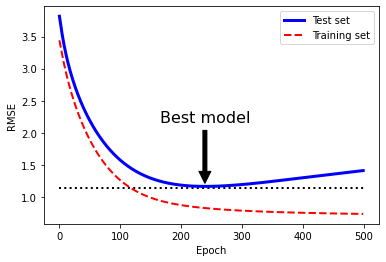

In [51]:
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005, random_state = 42)

n_epochs = 500
train_errors, test_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X = X_train_poly_scaled, y = y_train)
    y_train_predict = sgd_reg.predict(X = X_train_poly_scaled)
    y_test_predict = sgd_reg.predict(X = X_test_poly_scaled)
    train_errors.append(mean_squared_error(y_true = y_train, y_pred = y_train_predict))
    test_errors.append(mean_squared_error(y_true = y_test, y_pred = y_test_predict))
    
best_epoch = np.argmin(test_errors)
best_test_rmse = np.sqrt(test_errors[best_epoch])

fig, axes = plt.subplots()
axes.annotate(text = 'Best model',
              xy = (best_epoch, best_test_rmse),
              xytext = (best_epoch, best_test_rmse + 1),
              horizontalalignment = 'center',
              arrowprops = dict(facecolor = 'black', shrink = 0.05),
              fontsize = 16)

best_test_rmse -= 0.03 # just to make the graph look better

axes.plot([0, n_epochs], [best_test_rmse, best_test_rmse], linestyle = 'dotted', color = 'black', linewidth = 2)
axes.plot(np.sqrt(test_errors), label = 'Test set', color = 'blue', linestyle = 'solid', linewidth = 3)
axes.plot(np.sqrt(train_errors), label = 'Training set', color = 'red', linestyle = 'dashed', linewidth = 2)
axes.legend()
axes.set_xlabel('Epoch')
axes.set_ylabel('RMSE')
plt.show()

In [52]:
print(best_epoch)
print(best_model)

239
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)


In [53]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(start = t1a, stop = t1b, num = 500)
t2s = np.linspace(start = t2a, stop = t2b, num = 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis = 1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord = 1, axis = 1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord = 2, axis = 1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

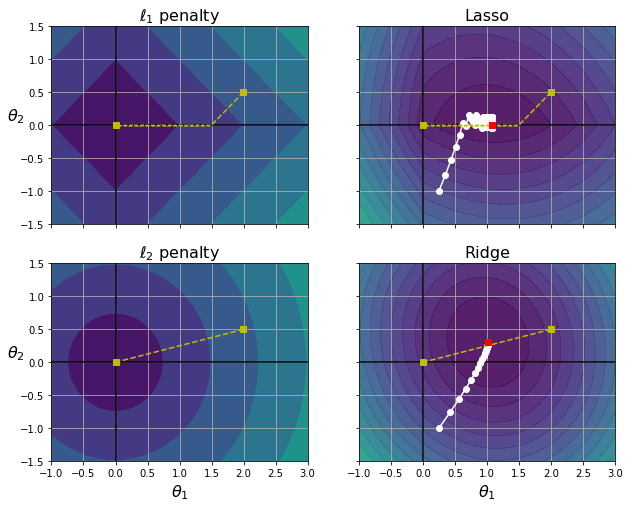

In [54]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2 / len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, 'Lasso'), (1, N2, 0,  2., 'Ridge')):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1 = 0, l2 = 0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1) / 3, np.sign(l2), core = 0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    ax.contourf(t1, t2, N / 2., levels = levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], 'y--')
    ax.plot(0, 0, 'ys')
    ax.plot(t1_min, t2_min, 'ys')
    ax.set_title(r'$\ell_{}$ penalty'.format(i + 1), fontsize = 16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r'$\theta_1$', fontsize = 16)
    ax.set_ylabel(r'$\theta_2$', fontsize = 16, rotation = 0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    ax.contourf(t1, t2, JR, levels = levelsJR, alpha = 0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], 'w-o')
    ax.plot(path_N[:, 0], path_N[:, 1], 'y--')
    ax.plot(0, 0, 'ys')
    ax.plot(t1_min, t2_min, 'ys')
    ax.plot(t1r_min, t2r_min, 'rs')
    ax.set_title(title, fontsize = 16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r'$\theta_1$', fontsize = 16)

plt.show()

# Estimating Probabilities

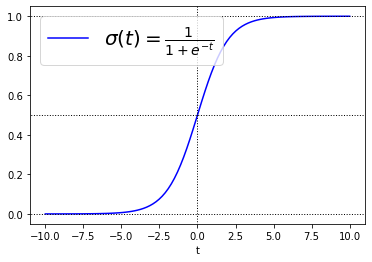

In [55]:
t = np.linspace(start = -10, stop = 10, num = 100)
sigmoid = 1 / (1 + np.exp(-t))

fig, axes = plt.subplots()
axes.plot(t, sigmoid, color = 'blue', linestyle = 'solid', label = r'$\sigma(t) = \frac{1}{1+e^{-t}}$')
axes.set_xlabel('t')
axes.axvline(x = 0.0, ymin = axes.get_ylim()[0], ymax = axes.get_ylim()[1], color = 'black', linestyle = 'dotted', linewidth = 1)
axes.axhline(y = 0.0, xmin = axes.get_xlim()[0], xmax = axes.get_xlim()[1], color = 'black', linestyle = 'dotted', linewidth = 1)
axes.axhline(y = 0.5, xmin = axes.get_xlim()[0], xmax = axes.get_xlim()[1], color = 'black', linestyle = 'dotted', linewidth = 1)
axes.axhline(y = 1.0, xmin = axes.get_xlim()[0], xmax = axes.get_xlim()[1], color = 'black', linestyle = 'dotted', linewidth = 1)
axes.legend(fontsize = 20)
plt.show()

# Decision Boundaries

In [56]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))

#print(iris['DESCR'])
print(iris['target_names'])
print(iris['feature_names'])

print(iris['data'][:3])
print(iris['target'])
print(len(iris['data']))
print(len(iris['target']))
# 0 = Iris-Setosa
# 1 = Iris-Versicolour
# 2 = Iris-Virginica

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150
150


In [57]:
X = iris['data'][:, 3:] # petal width (cm)
y = (iris['target'] == 2).astype(int) # 1 if Iris-Virginica, else 0

In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'lbfgs', random_state = 42)
log_reg.fit(X = X, y = y)

LogisticRegression(random_state=42)

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]
[1.65765766]
[1.66066066]
[1.66066066]
[1.65765766]


/usr/local/lib/python3.9/site-packages/matplotlib/patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


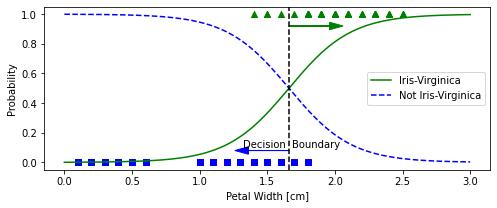

In [59]:
fig, axes = plt.subplots(figsize = (8, 3))
#print(min(X))
#print(max(X))
# 0 is approximately equal to min(X), the smallest petal width
# 3 is approximately equal to max(X), the largest petal width
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X = X_new)
print(y_proba)
axes.plot(X_new, y_proba[:, 1], label = 'Iris-Virginica', color = 'green', linestyle = 'solid')
axes.plot(X_new, y_proba[:, 0], label = 'Not Iris-Virginica', color = 'blue', linestyle = 'dashed')
axes.legend()
axes.set_xlabel('Petal Width [cm]')
axes.set_ylabel('Probability')

print(X_new[y_proba[:, 0] > 0.5][-1])
print(X_new[y_proba[:, 0] < 0.5][0])
print(X_new[y_proba[:, 1] > 0.5][0])
print(X_new[y_proba[:, 1] < 0.5][-1])
decision_boundary = X_new[y_proba[:, 1] > 0.5][0]
axes.axvline(x = decision_boundary, ymin = 0, ymax = 1, color = 'black', linestyle = 'dashed')
axes.text(x = decision_boundary + 0.02, y = 0.10, s = 'Decision  Boundary', horizontalalignment = 'center', color = 'black')
axes.arrow(x = decision_boundary, y = 0.08, dx = -0.3, dy = 0, head_width = 0.05, head_length = 0.1, facecolor = 'blue', edgecolor = 'blue')
axes.arrow(x = decision_boundary, y = 0.92, dx = +0.3, dy = 0, head_width = 0.05, head_length = 0.1, facecolor = 'green', edgecolor = 'green')

axes.scatter(x = X[y == 0], y = y[y == 0], color = 'blue', marker = 's')
axes.scatter(x = X[y == 1], y = y[y == 1], color = 'green', marker = '^')
plt.show()

In [60]:
print(decision_boundary)
print(log_reg.predict(X = [[1.5], [1.7]]))

[1.66066066]
[0 1]


[0 1]


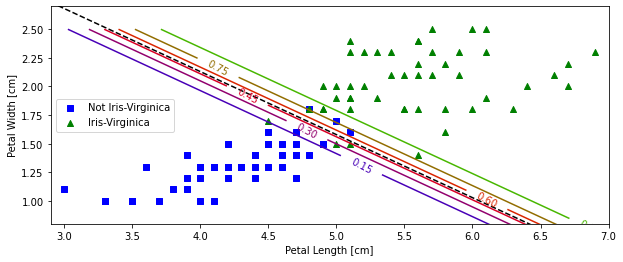

In [61]:
# np.all(iris['data'][:, 2:] == iris['data'][:, (2, 3)])
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = (iris['target'] == 2).astype(int) # 1 if Iris-Virginica, else 0

fig, axes = plt.subplots(figsize = (10, 4))
axes.scatter(x = X[:, 0][y == 0], y = X[:, 1][y == 0], color = 'blue', marker = 's', label = 'Not Iris-Virginica')
axes.scatter(x = X[:, 0][y == 1], y = X[:, 1][y == 1], color = 'green', marker = '^', label = 'Iris-Virginica')
axes.set_xlabel('Petal Length [cm]')
axes.set_ylabel('Petal Width [cm]')

# Must use value of kwarg C to reproduce plot in author's notebook
log_reg = LogisticRegression(solver = 'lbfgs', C = 10**10, random_state = 42)
log_reg.fit(X = X, y = y)
print(log_reg.classes_)

x0, x1 = np.meshgrid(
    np.linspace(min(X[:, 0]), max(X[:, 0]), 500),
    np.linspace(min(X[:, 1]), max(X[:, 1]), 500))

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X = X_new)

zz = y_proba[:, 1].reshape(x0.shape)
contour = axes.contour(x0, x1, zz, cmap = plt.cm.brg)
axes.clabel(contour, inline = True)

left_right = np.array([min(X[:, 0]), max(X[:, 0])])
# For the equation below, refer to the footnote on page 148 of the book
# It is the set of points vector{x} such that theta_{0} + theta_{1} * x_{1} + theta_{2} * x_{2} = 0, which defines a straight line
# That is, x_{2} = -(theta_{1} * x_{1} + theta_{0}) / theta_{2}
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
axes.plot(left_right, boundary, c = 'black', linestyle = 'dashed') # affects limits of axes of plot

axes.legend()
axes.set_xlim(2.9, 7.0)
axes.set_ylim(0.8, 2.7)
plt.show()

In [62]:
print(log_reg.classes_)
for instance in ([3, 1.0],
                 [6, 2.5],
                 [5, 1.5]):
    print(log_reg.predict_proba([instance]), log_reg.predict([instance]))

[0 1]
[[9.99999976e-01 2.35978475e-08]] [0]
[[2.10945046e-07 9.99999789e-01]] [1]
[[0.69628382 0.30371618]] [0]


# Softmax Regression

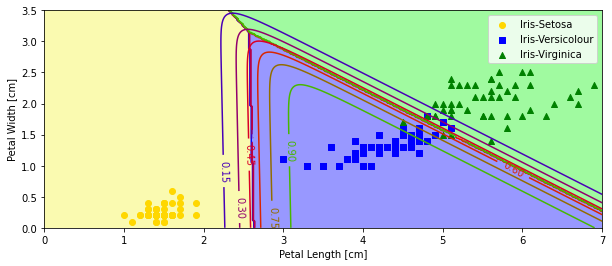

In [63]:
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = iris['target']

fig, axes = plt.subplots(figsize = (10, 4))
axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'gold', marker = 'o', label = 'Iris-Setosa')
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
axes.scatter(x = X[y == 2, 0], y = X[y == 2, 1], color = 'green', marker = '^', label = 'Iris-Virginica')
axes.set_xlabel('Petal Length [cm]')
axes.set_ylabel('Petal Width [cm]')

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10, random_state = 42)
softmax_reg.fit(X = X, y = y)

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500),
    np.linspace(0, 3.5, 200))

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X = X_new)
y_predict = softmax_reg.predict(X = X_new)

zz0 = y_proba[:, 0].reshape(x0.shape)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz2 = y_proba[:, 2].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

axes.contourf(x0, x1, zz, cmap = custom_cmap, zorder = 0)

contour = axes.contour(x0, x1, zz, cmap = plt.cm.brg)
axes.clabel(contour, fontsize = 0)

#for z in (zz0, zz1, zz2):
for z in (zz1,):
    contour = axes.contour(x0, x1, z, cmap = plt.cm.brg)
    axes.clabel(contour, inline = True)

axes.legend()
axes.set_xlim(0, 7.0)
axes.set_ylim(0, 3.5)
plt.show()

In [64]:
print(softmax_reg.classes_)
for instance in ([1.5, 0.25],
                 [4.0, 1.00],
                 [6.5, 2.00],
                 [5.0, 1.50],
                 [2.6, 3.00]):
    print(softmax_reg.predict_proba([instance]), softmax_reg.predict([instance]))

[0 1 2]
[[9.95273338e-01 4.72666225e-03 2.64282472e-13]] [0]
[[1.38645415e-03 9.98287382e-01 3.26163368e-04]] [1]
[[9.11936359e-13 1.01632045e-04 9.99898368e-01]] [2]
[[7.15110892e-06 6.18302730e-01 3.81690119e-01]] [1]
[[0.39029691 0.43096385 0.17873924]] [1]


# Exercise 1

Refer to Table 4-1: Batch Gradient Descent, Stochastic Gradient Descent, Mini-batch Gradient Descent.

# Exercise 2

Refer to Table 4-1: Batch Gradient Descent, Stochastic Gradient Descent, Mini-batch Gradient Descent.
Page 123: When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn's StandardScaler class), or else it will take much longer to converge. Page 122: If the features have different scales, the cost function will become elongated. 

# Exercise 3

Page 122: The Mean Squared Error for a Linear/Logistic Regression model happens to be a convex function. This implies that there is no local minima, just one global minimum.

# Exercise 4

Page 121: No. If the learning rate is too high, the algorithm might diverge, with larger and larger values for the cost function. The random initialization may lead to the algorithm converging on a local minimum, which is not as good as the global minimum. If stopped too early, the algorithm may be on a plateau of the cost function.

# Exercise 5

One possibility is that the learning rate is too high causing the algorithm to diverge. If the training error is also increasing, then this is indeed the problem and the learning rate should be reduced. However, if the training error is not increasing, then the model is overfitting the training set. In this case, the model is overfitting the training set and a different model should be used.

# Exercise 6

No. Stochastic Gradient Descent and Mini-batch Gradient Descent have randomness built into them and therefore are not guaranteed to minimize the cost function at each step. See, for example, Figure 4-16. Page 143: One solution is to stop if the validation error has increased after multiple epochs, and roll back the model parameters to the point where the validation error was at a minimum.

# Exercise 7

Fastest:

Stochastic Gradient Descent. See page 126.

Convergence:

Batch Gradient Descent (assuming the learning rate and number of iterations are set correctly).

How to make others converge:

Page 127: the randomness used in Stochastic Gradient Descent and Mini-batch Gradient Descent means these algorithms can never settle at the minimum. One solution to this problem is to gradually reduce the learning rate using a learning schedule.

# Exercise 8

Page 135 and Figure 4-16: The model is performing significantly better on the training data than on the validation data, which is a hallmark of an overfitting model.

To solve this, one could: 1) Use a larger training set (pages 135-136) 2) Reduce the degrees of freedom and use a simpler model (page 136) 3) Add regularization with, for example, Ridge Regression or Lasso Regression (page 136)

# Exercise 9

Page 134 and Figure 4-15: These learning curves are typical of an underfitting model. Page 136: A high-bias model is most likely to underfit the training data. Page 138 and Figure 4-17: Decrease the regularization hyperparameter alpha.

# Exercise 10

Ridge Regression instead of plain Linear Regression (i.e., without any regularization):

Page 136: When the model is overfitting the training set.

Lasso instead of Ridge Regression:

Page 140: An important feature of Lasso Regression is that it tends to completely eliminate the weights of the least important features. Page 142: If you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero.

Elastic Net instead of Lasso:

Page 142: In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

# Exercise 11

Page 150: The Softmax Regression classifier predicts only one class at a time (that is, it is multiclass, not multioutput) so it should be used only with mutually exclusive classes. Since the goal is to classify a picture as, for example, outdoor and daytime, which is multioutput, you cannot use Softmax Regression. You will have to implement two Logistic Regression classifiers.

# Exercise 12 - Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)

In [65]:
X = iris['data'][:, (2, 3)] # petal length (cm), petal width (cm)
y = iris['target']

In [66]:
X_with_bias = np.c_[np.ones(shape = (len(X), 1)), X]

In [67]:
np.random.seed(2042)

In [68]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(test_ratio * total_size)
validation_size = int(validation_ratio * total_size)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
X_test  = X_with_bias[rnd_indices[-test_size:]]

y_train = y[rnd_indices[:train_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
y_test  = y[rnd_indices[-test_size:]]

In [69]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros(shape = (m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [70]:
print(y_train[:10])

[0 1 2 1 1 0 1 1 1 0]


In [71]:
print(to_one_hot(y_train[:10]))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [72]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot  = to_one_hot(y_test)

In [73]:
# Equation 4-20
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis = 1, keepdims = True)
    return exps / exp_sums

In [74]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train)) # == 3 (3 iris classes)

In [75]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta) # Equation 4-19
    Y_proba = softmax(logits) # Equation 4-20
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1)) # Equation 4-22
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot # Equation 4-23
    gradients = 1 / m * X_train.T.dot(error) # Equation 4-23
    Theta = Theta - eta * gradients # Equation 4-7

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [76]:
print(Theta)

[[ 3.32094157 -0.6501102  -2.99979416]
 [-1.1718465   0.11706172  0.10507543]
 [-0.70224261 -0.09527802  1.4786383 ]]


In [77]:
logits = X_valid.dot(Theta) # Equation 4-19
Y_proba = softmax(logits) # Equation 4-20
y_predict = np.argmax(Y_proba, axis = 1) # Equation 4-21

accuracy_score = np.mean(y_predict == y_valid)
print(accuracy_score)

0.9666666666666667


In [78]:
np.mean(y_predict == y_valid)

0.9666666666666667

In [79]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta) # Equation 4-19
    Y_proba = softmax(logits) # Equation 4-20
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1)) # Equation 4-22
        l2_loss = 1 / 2 * np.sum(np.square(Theta[1:])) # Equation 4-8
        loss = xentropy_loss + alpha * l2_loss # Equation 4-8
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot # Equation 4-23
    gradients = 1 / m * X_train.T.dot(error) + np.r_[np.zeros(shape = (1, n_outputs)), alpha * Theta[1:]] # Equation 4-23 plus derivative/gradient of Equation 4-8 
    Theta = Theta - eta * gradients # Equation 4-7

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.4890351244397859
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [80]:
logits = X_valid.dot(Theta) # Equation 4-19
Y_proba = softmax(logits) # Equation 4-20
y_predict = np.argmax(Y_proba, axis = 1) # Equation 4-21

accuracy_score = np.mean(y_predict == y_valid)
print(accuracy_score)

1.0


In [81]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta) # Equation 4-19
    Y_proba = softmax(logits) # Equation 4-20
    error = Y_proba - Y_train_one_hot # Equation 4-23
    gradients = 1 / m * X_train.T.dot(error) + np.r_[np.zeros(shape = (1, n_outputs)), alpha * Theta[1:]] # Equation 4-23 plus derivative/gradient of Equation 4-8 
    Theta = Theta - eta * gradients # Equation 4-7
    
    logits = X_valid.dot(Theta) # Equation 4-19
    Y_proba = softmax(logits) # Equation 4-20
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis = 1)) # Equation 4-22
    l2_loss = 1 / 2 * np.sum(np.square(Theta[1:])) # Equation 4-8
    loss = xentropy_loss + alpha * l2_loss # Equation 4-8
    
    if iteration % 500 == 0:
        print(iteration, loss)
    
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, 'early stopping!')
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580262
2000 0.5331959249285545
2500 0.5325946767399382
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [82]:
logits = X_valid.dot(Theta) # Equation 4-19
Y_proba = softmax(logits) # Equation 4-20
y_predict = np.argmax(Y_proba, axis = 1) # Equation 4-21

accuracy_score = np.mean(y_predict == y_valid)
print(accuracy_score)

1.0


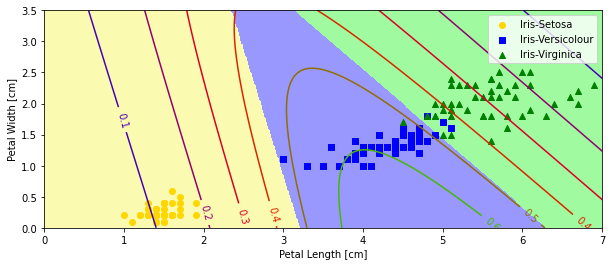

In [83]:
fig, axes = plt.subplots(figsize = (10, 4))
axes.scatter(x = X[y == 0, 0], y = X[y == 0, 1], color = 'gold', marker = 'o', label = 'Iris-Setosa')
axes.scatter(x = X[y == 1, 0], y = X[y == 1, 1], color = 'blue', marker = 's', label = 'Iris-Versicolour')
axes.scatter(x = X[y == 2, 0], y = X[y == 2, 1], color = 'green', marker = '^', label = 'Iris-Virginica')
axes.set_xlabel('Petal Length [cm]')
axes.set_ylabel('Petal Width [cm]')

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500),
    np.linspace(0, 3.5, 200))

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones((len(X_new), 1)), X_new]

logits = X_new_with_bias.dot(Theta) # Equation 4-19
Y_proba = softmax(logits) # Equation 4-20
y_predict = np.argmax(Y_proba, axis = 1) # Equation 4-21

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

axes.contourf(x0, x1, zz, cmap = custom_cmap, zorder = 0)

contour = axes.contour(x0, x1, zz1, cmap = plt.cm.brg)
axes.clabel(contour)

axes.legend()
axes.set_xlim(0, 7.0)
axes.set_ylim(0, 3.5)
plt.show()

In [84]:
logits = X_test.dot(Theta) # Equation 4-19
Y_proba = softmax(logits) # Equation 4-20
y_predict = np.argmax(Y_proba, axis = 1) # Equation 4-21

accuracy_score = np.mean(y_predict == y_test)
print(accuracy_score)

0.9333333333333333
